# MUHAMMAD ALPI ASHARI
## 2209106017 | POSTTEST 7

### EKSTRAK FILE DATASET

LINK DATASET : https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/data

LINK DATASET YANG DIGABUNG : https://drive.google.com/file/d/1vvifGRMD01OFJPxjOf2bMuQNZNc3HRcs/view?usp=sharing

In [1]:
!unzip '/content/drive/MyDrive/cell_images.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_2

### SPLIT DATASET

DATASET DI SPLIT DENGAN RASIO 80,10,10

In [2]:
!pip install split-folders

In [5]:
import splitfolders

In [6]:
splitfolders.ratio("cell_images",
                   output="dataset_final",
                   seed = 1337,
                   ratio=(.8,.1,.1))

Copying files: 27560 files [00:06, 4376.88 files/s]


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### MENGUBAH BENTUK GAMBAR DARI TRAIN DAN VAL

In [8]:
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [9]:
train_generator  = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator  = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

Found 22046 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


### IMPORT LIBRARY

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### MEMBUAT MODEL

In [11]:
model = Sequential([

    Conv2D(16,(3,3), activation = 'relu', input_shape = (68,68,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### MEMBUAT FITUR CALLBACK DAN MELATIH MODEL

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
history = model.fit(train_generator, epochs = 50,
          validation_data = val_generator,
          verbose = 1, callbacks=[early_stopping])

Epoch 1/50
689/689 [==============================] - 42s 45ms/step - loss: 0.3404 - accuracy: 0.8513 - val_loss: 0.2103 - val_accuracy: 0.9307
Epoch 2/50
689/689 [==============================] - 31s 44ms/step - loss: 0.1779 - accuracy: 0.9391 - val_loss: 0.1752 - val_accuracy: 0.9434
Epoch 3/50
689/689 [==============================] - 30s 44ms/step - loss: 0.1400 - accuracy: 0.9546 - val_loss: 0.1619 - val_accuracy: 0.9456
Epoch 4/50
689/689 [==============================] - 30s 44ms/step - loss: 0.1135 - accuracy: 0.9618 - val_loss: 0.1591 - val_accuracy: 0.9488
Epoch 5/50
689/689 [==============================] - 30s 44ms/step - loss: 0.0896 - accuracy: 0.9691 - val_loss: 0.2043 - val_accuracy: 0.9459
Epoch 6/50
689/689 [==============================] - 30s 43ms/step - loss: 0.0648 - accuracy: 0.9787 - val_loss: 0.1913 - val_accuracy: 0.9438
Epoch 7/50
689/689 [==============================] - 34s 49ms/step - loss: 0.0468 - accuracy: 0.9835 - val_loss: 0.2024 - val_accuracy:

In [14]:
test_datagen  = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2756 images belonging to 2 classes.


### EVALUATE HASIL MODEL

In [15]:
model.evaluate(test_generator)

87/87 [==============================] - 3s 35ms/step - loss: 0.2875 - accuracy: 0.9528


[0.2875490188598633, 0.9528301954269409]

### MEMBUAT PLOT HASIL TRAIN

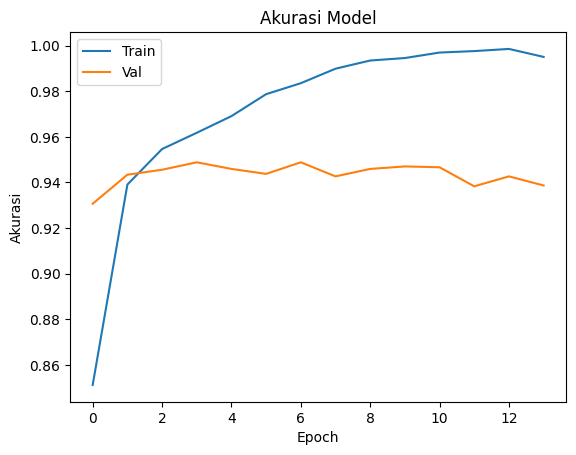

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

DATASET CUKUP BAIK KARENA HASIL DARI TRAIN DAN VAL MENUNJUKKAN ARAH YANG BAIK

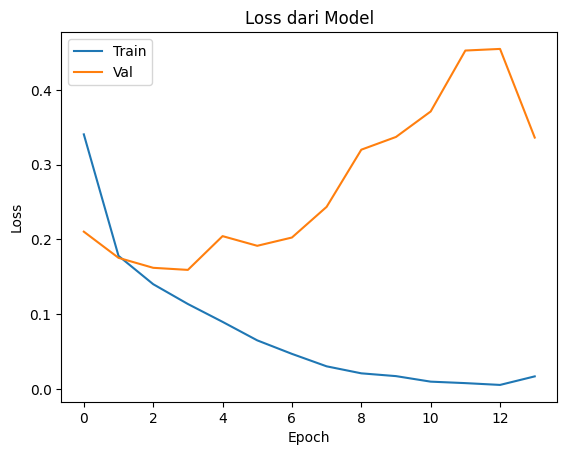

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss dari Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

DATASET CUKUP BAGUS KARENA TRAIN MENGHASILKAN ALUR YANG CUKUP BAIK WALAUPUN VAL MENUNJUKKAN HASIL YANG KURANG MAKSIMAL